In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
X = np.linspace(-3, 3 ,30).reshape(-1,1)
y_true = np.sin(2*X).ravel()
y = y_true + np.random.normal(scale = 0.3, size = y_true.shape)

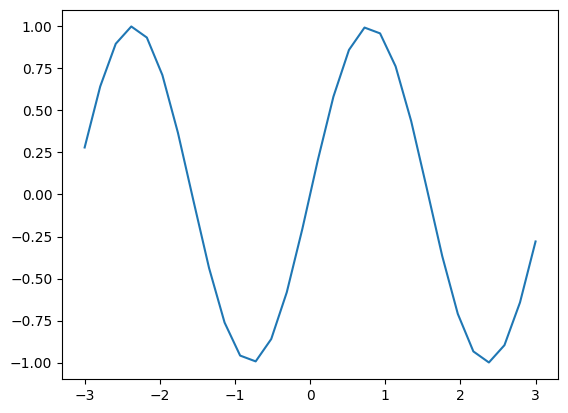

In [23]:
plt.plot(X, y_true)

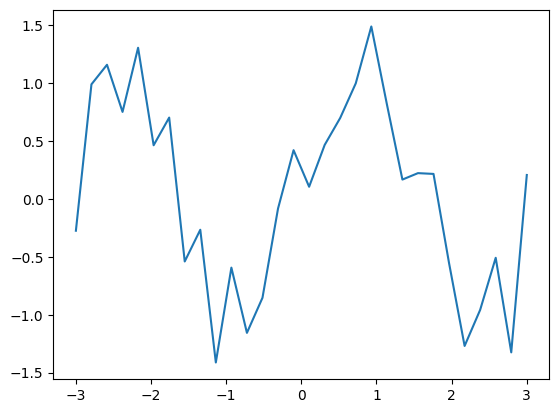

In [24]:
plt.plot(X, y)

In [25]:
X_poly=np.hstack([X, X**2])

In [26]:
# setup prior

lambda_param = 1
sigma2 = 0.9
prior_mean = np.zeros(X_poly.shape[1])
prior_cov = np.eye(X_poly.shape[1]) * (1/lambda_param)

# initialize posterior

posterior_mean = prior_mean
posterior_cov = prior_cov

                   



In [31]:
# sequential updating

for i in range(X_poly.shape[0]):
    xi = X_poly[i].reshape(1,-1)
    yi = y[i]

    S_inv = np.linalg.inv(posterior_cov) + (1/sigma2) * xi.T @ xi
    posterior_cov = np.linalg.inv(S_inv)

    posterior_mean = (1/sigma2) * posterior_cov * xi.T * yi
    #posterior_mean = posterior_cov @ (np.linalg.inv(prior_cov) @ prior_mean + (1/sigma2) * xi.T * yi)

In [32]:
posterior_mean 

array([[3.09213754e-03, 7.01020890e-05],
       [2.10306267e-04, 1.57584661e-03]])

In [33]:
posterior_cov

array([[0.00446204, 0.00010116],
       [0.00010116, 0.000758  ]])

Approach of getting your weights

